In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo classify train model=yolov8n-cls.pt data="/content/drive/MyDrive/PCD_Proyek/Model" epochs=20

Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/PCD_Proyek/Model, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

In [ ]:
import shutil

# Buat zip dari folder
shutil.make_archive('/content/train5', 'zip', '/content/runs/classify/train3')

'/content/train5.zip'

In [ ]:
from google.colab import files

# Download file zip
files.download('/content/train5.zip') ## sesuai zip nya sesuai best result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Predict

In [3]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Fungsi Evaluasi

In [24]:
def test_accuracy_yolo(test_dir, model_path, plot_random=False, n_samples=8, show_class_eval=True):
    """
    Menguji akurasi model YOLO pada dataset uji.

    Args:
        test_dir (str): Path direktori data uji.
        model_path (str): Path model YOLO yang sudah dilatih.
        plot_random (bool): Tampilkan gambar acak dengan prediksi. Default False.
        n_samples (int): Jumlah gambar acak yang ditampilkan. Default 8.
        show_class_eval (bool): Tampilkan evaluasi per kelas. Default True.

    Returns:
        tuple: (akurasi total, metrik per kelas)
    """
    model = YOLO(model_path)
    test_folders = os.listdir(test_dir)

    # Inisialisasi variabel
    total_predictions = 0
    correct_predictions = 0
    result_dict = {}
    y_true = []
    y_pred = []
    class_correct = {}
    class_total = {}

    # Persiapkan perhitungan per kelas
    for folder in test_folders:
        class_correct[folder] = 0
        class_total[folder] = 0

    # Evaluasi setiap folder kelas
    for folder in test_folders:
        folder_path = f'{test_dir}/{folder}'
        results = model(folder_path, verbose=False)
        result_dict[folder] = results

        for result in results:
            total_predictions += 1
            class_total[folder] += 1

            top1 = result.probs.top1
            classes = result.names
            top1_class_name = classes[top1]

            y_true.append(folder)
            y_pred.append(top1_class_name)

            if top1_class_name == folder:
                correct_predictions += 1
                class_correct[folder] += 1

    # Hitung akurasi total
    overall_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    # Hitung metrik per kelas
    class_metrics = {}
    for class_name in test_folders:
        if class_total[class_name] > 0:
            accuracy = class_correct[class_name] / class_total[class_name]
            class_metrics[class_name] = {
                'accuracy': accuracy,
                'correct': class_correct[class_name],
                'total': class_total[class_name]
            }
        else:
            class_metrics[class_name] = {'accuracy': 0.0, 'correct': 0, 'total': 0}

    # Tampilkan hasil evaluasi jika diminta
    if show_class_eval:
        print("="*60)
        print("EVALUASI KELAS DETAIL")
        print("="*60)
        print(f"{'Kelas':<15} {'Akurasi':<10} {'Benar':<8} {'Total':<8}")
        print("-"*60)

        for class_name, metrics in class_metrics.items():
            print(f"{class_name:<15} {metrics['accuracy']:<10.2%} {metrics['correct']:<8} {metrics['total']:<8}")

        print("-"*60)
        print(f"{'Total':<15} {overall_accuracy:<10.2%} {correct_predictions:<8} {total_predictions:<8}")
        print("="*60)

        if len(set(y_true)) > 1:
            print("\nCLASSIFICATION REPORT:")
            print("-"*60)
            report = classification_report(y_true, y_pred, target_names=test_folders, zero_division=0, digits=3)
            print(report)

            print("\nCONFUSION MATRIX:")
            print("-"*60)
            cm = confusion_matrix(y_true, y_pred, labels=test_folders)
            plt.figure(figsize=(10, 8))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_folders, yticklabels=test_folders)
            plt.title('Confusion Matrix')
            plt.xlabel('Predicted Class')
            plt.ylabel('True Class')
            plt.tight_layout()
            plt.show()

    # Plot gambar acak jika diminta
    if plot_random:
        import math
        c = 4
        r = math.ceil(n_samples / c)
        plt.figure(figsize=(20, 5 * r + 1))
        plt.suptitle(f'Sampel Random dan Prediksi\nAkurasi Total: {overall_accuracy:.2%}', fontsize=16)

        for i in range(n_samples):
            random_label = random.choice(list(result_dict.keys()))
            random_path = f'{test_dir}/{random_label}'
            pred_vals = result_dict[random_label]
            random_result = random.choice(pred_vals)
            random_top1 = random_result.probs.top1
            classes = random_result.names
            random_top1_class_name = classes[random_top1]
            confidence = random_result.probs.top1conf.tolist()

            is_correct = random_top1_class_name == random_label
            border_color = 'green' if is_correct else 'red'

            plt.subplot(r, c, i + 1)
            plt.imshow(get_rgb_image(random_result.orig_img))
            plt.ylabel(f'True: {random_label}', color='blue', fontweight='bold')
            plt.xlabel(f'Pred: {random_top1_class_name}', color='green' if is_correct else 'red', fontweight='bold')
            plt.title(f'Confidence: {confidence:.2f}\n{"✓ Benar" if is_correct else "✗ Salah"}',
                      color=border_color, fontweight='bold')

            ax = plt.gca()
            for spine in ax.spines.values():
                spine.set_edgecolor(border_color)
                spine.set_linewidth(3)

            plt.axis('off')

        plt.tight_layout()
        plt.show()

    return overall_accuracy, class_metrics


def print_class_summary(class_metrics, overall_accuracy):
    """
    Menampilkan ringkasan performa model berdasarkan akurasi tiap kelas.
    """
    print("\n" + "="*50)
    print("RINGKASAN PERFORMA KELAS")
    print("="*50)

    sorted_classes = sorted(class_metrics.items(), key=lambda x: x[1]['accuracy'], reverse=True)

    print("Performa terbaik:")
    for i, (class_name, metrics) in enumerate(sorted_classes[:3]):
        print(f"{i+1}. {class_name}: {metrics['accuracy']:.2%} "
              f"({metrics['correct']}/{metrics['total']})")

    print("\nPerforma terendah:")
    for i, (class_name, metrics) in enumerate(sorted_classes[-3:]):
        print(f"{i+1}. {class_name}: {metrics['accuracy']:.2%} "
              f"({metrics['correct']}/{metrics['total']})")

    print(f"\nAkurasi Model Keseluruhan: {overall_accuracy:.2%}")
    print("="*50)

## Test Set

In [25]:
def get_rgb_image(image):
    """Convert BGR image to RGB format"""
    if len(image.shape) == 3 and image.shape[2] == 3:
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

EVALUASI KELAS DETAIL
Kelas           Akurasi    Benar    Total   
------------------------------------------------------------
rotten          90.00%     90       100     
unrotten        90.00%     90       100     
------------------------------------------------------------
Total           90.00%     180      200     

CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

      rotten      0.900     0.900     0.900       100
    unrotten      0.900     0.900     0.900       100

    accuracy                          0.900       200
   macro avg      0.900     0.900     0.900       200
weighted avg      0.900     0.900     0.900       200


CONFUSION MATRIX:
------------------------------------------------------------


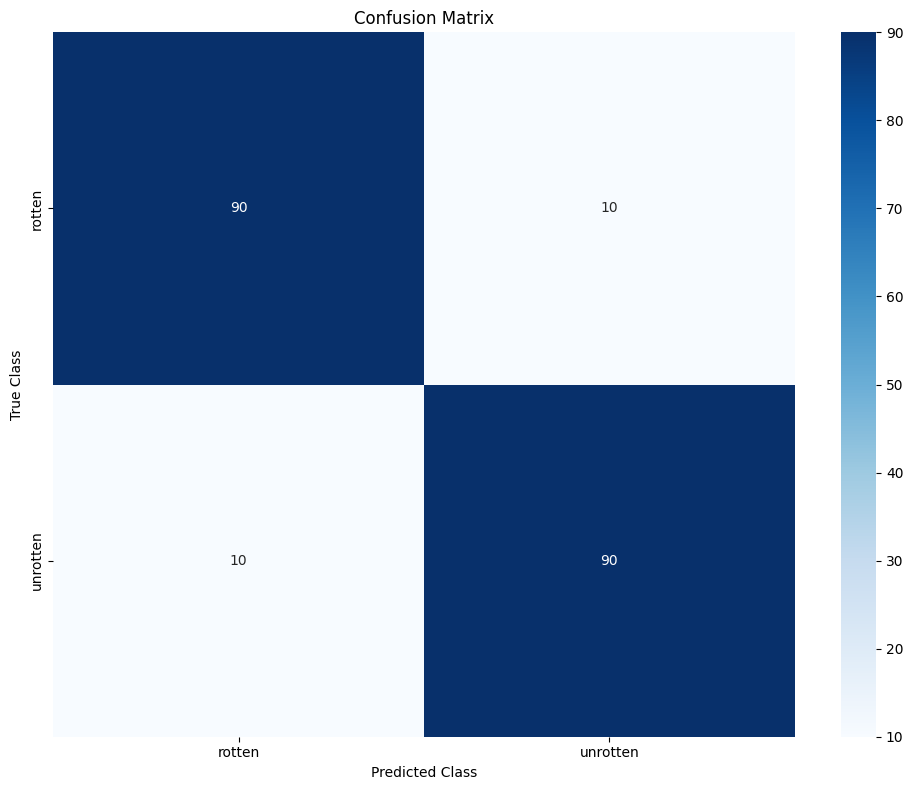

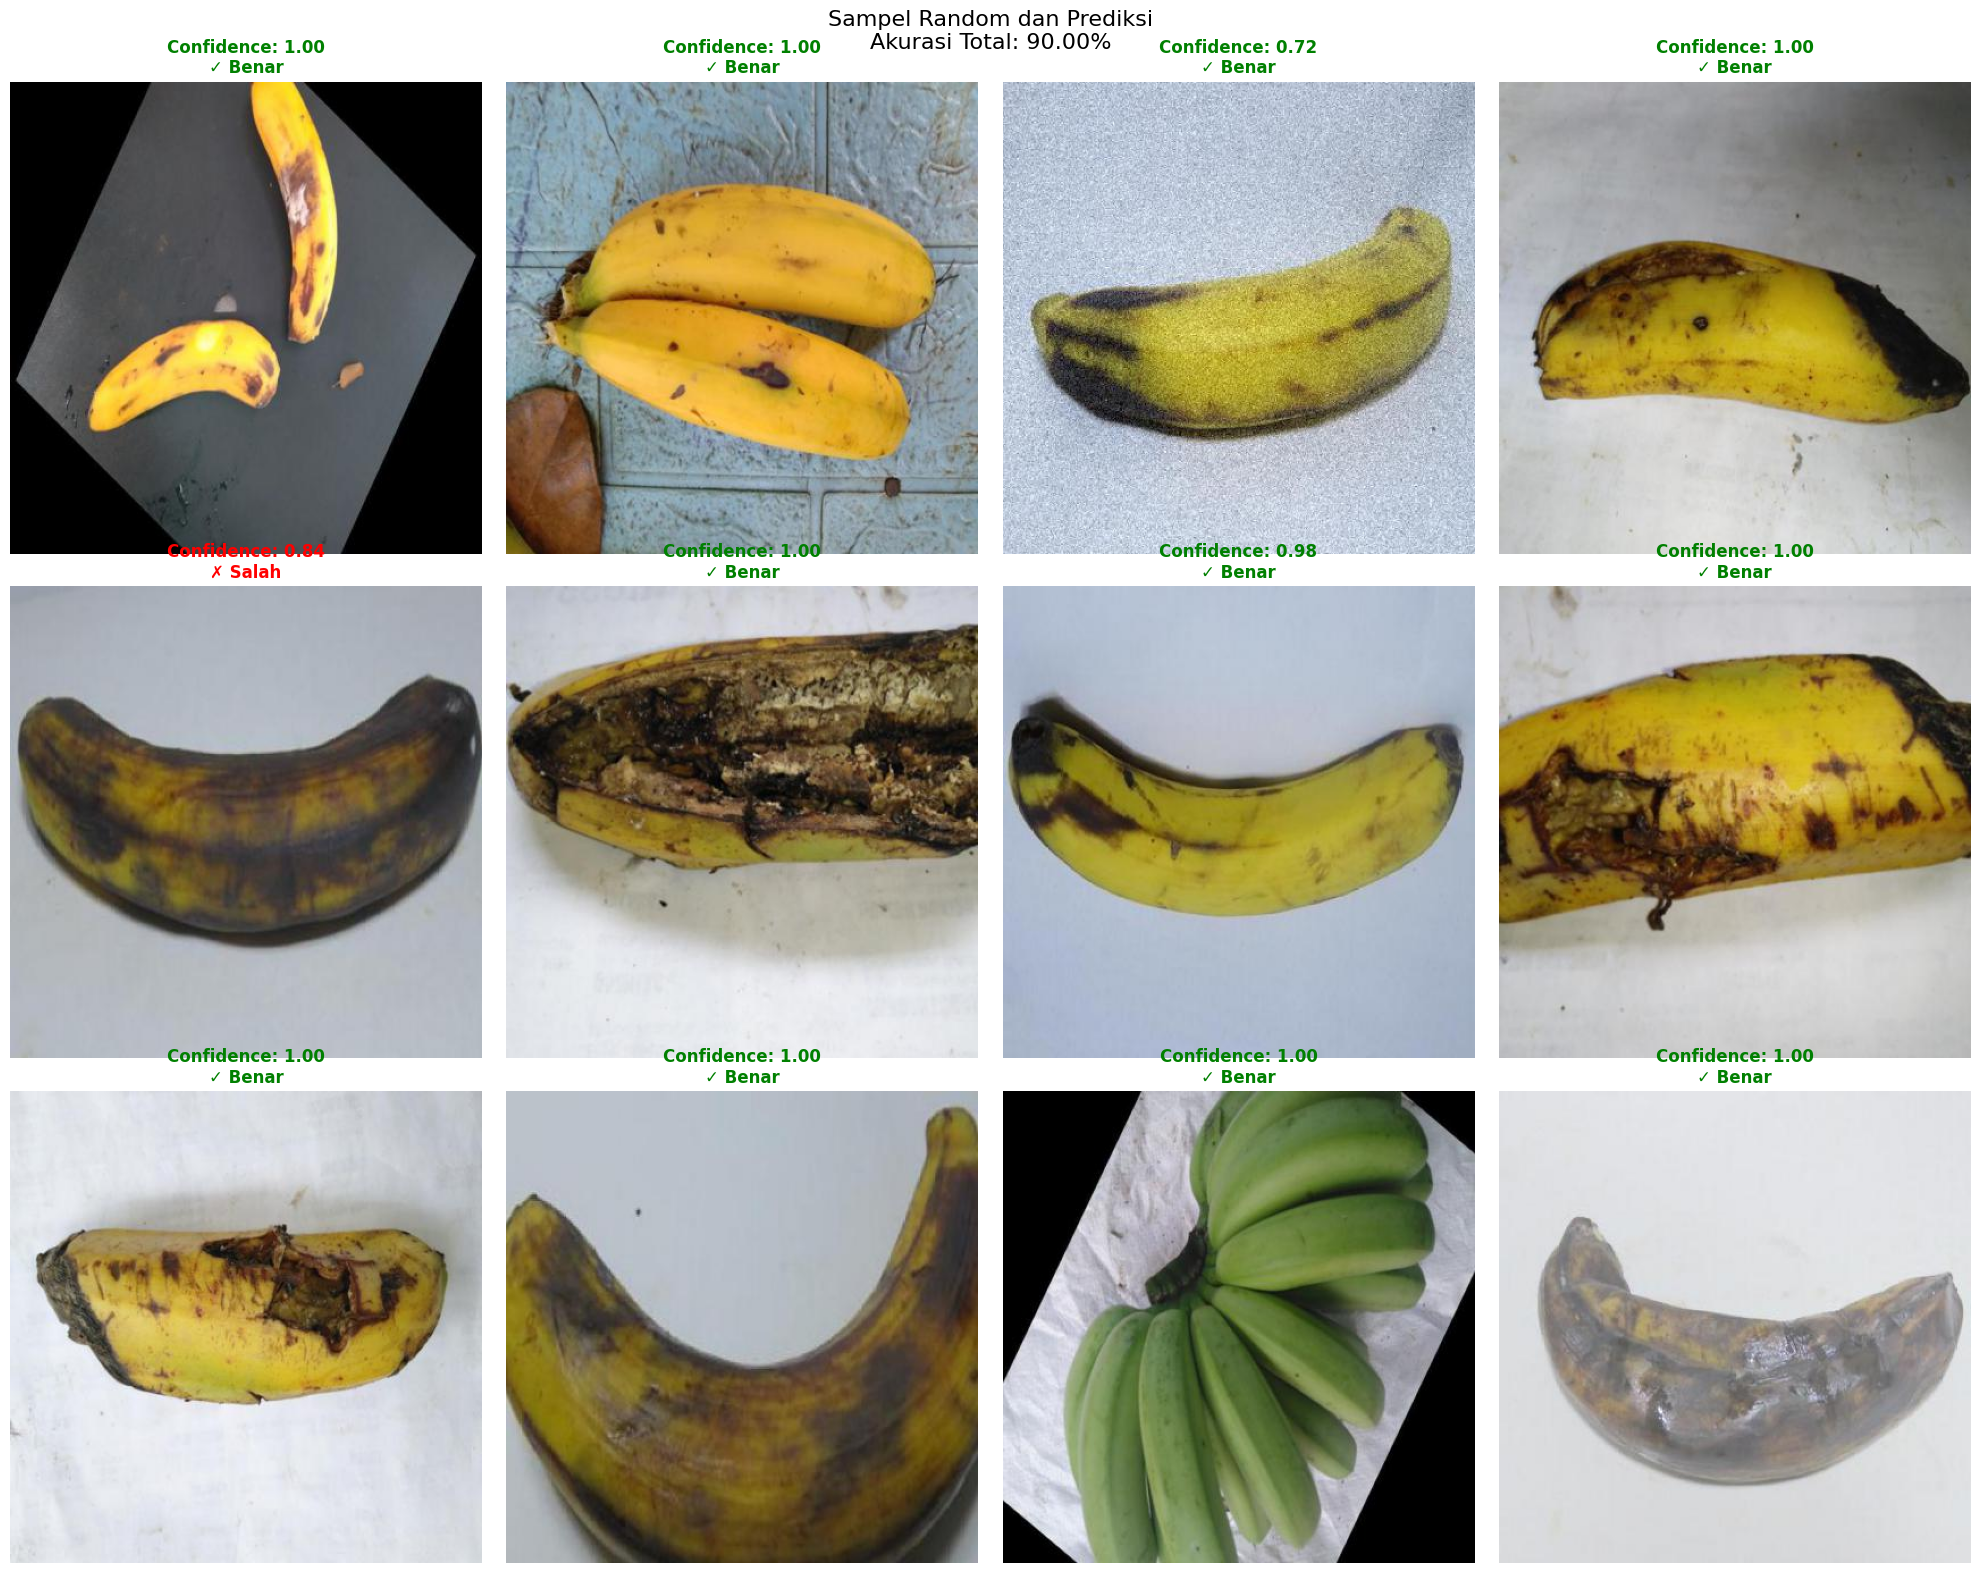


RINGKASAN PERFORMA KELAS
Performa terbaik:
1. rotten: 90.00% (90/100)
2. unrotten: 90.00% (90/100)

Performa terendah:
1. rotten: 90.00% (90/100)
2. unrotten: 90.00% (90/100)

Akurasi Model Keseluruhan: 90.00%

Final Results:
Overall Test Accuracy: 90.00%


In [26]:
test_directory = '/content/drive/MyDrive/PCD Proyek/Model/test'
model_path = '/content/drive/MyDrive/PCD Proyek/Model/train5/weights/best.pt'

# Run evaluation with detailed class metrics
accuracy, class_metrics = test_accuracy_yolo(
    test_directory,
    model_path,
    plot_random=True,
    n_samples=12,
    show_class_eval=True
)

# Print additional summary
print_class_summary(class_metrics, accuracy)

print(f"\nFinal Results:")
print(f"Overall Test Accuracy: {accuracy:.2%}")

# Mapping nama class

In [27]:
# Class mapping
mapping_rayleigh_noise = {
    'unrotten_rayleigh': 1,  # unrotten
    'rotten_rayleigh': 0,     # rotten
}

mapping_rayleigh_restorasi = {
    'unrotten_rayleigh_bilateral5x5': 1,  # unrotten
    'rotten_rayleigh_bilateral5x5': 0     # rotten
}

mapping_gaussian_noise = {
    'unrotten_gaussian': 1,  # unrotten
    'rotten_gaussian': 0,     # rotten
}
mapping_gaussian_restorasi = {
    'unrotten_gaussian_mean5x5': 1,  # unrotten
    'rotten_gaussian_mean5x5': 0     # rotten
}

mapping_saltnpepper_noise = {
    'noise_unrotten_saltnpepper': 1,  # unrotten
    'noise_rotten_saltnpepper': 0,     # rotten
}
mapping_saltnpepper_restorasi = {
    'unrotten_saltnpepper': 1,  # unrotten
    'rotten_saltnpepper': 0     # rotten
}

class_names = ['unrotten', 'rotten']

y_true = []
y_pred = []


# Rayleigh

##Evaluasi

In [28]:
from glob import glob

In [29]:
import random
from tqdm import tqdm
import warnings
from collections import defaultdict
import os
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
model_path = '/content/drive/MyDrive/PCD Proyek/Model/train5/weights/best.pt'
noise_rayleigh = '/content/drive/MyDrive/PCD Proyek/Model/test noise/rayleigh'
# restorasi_rayleigh = '/content/drive/MyDrive/PCD Proyek/Model/test restorasi/rayleigh'
restorasi_rayleigh = '/content/drive/MyDrive/PCD Proyek/Model/test restorasi/rayleigh2'
output_dir = '/content/output'
conf_threshold = 0.5

model = YOLO(model_path)

In [42]:
def evaluate_yolo_model(model, test_directory, folder_mapping, class_names, conf_threshold=0.5, title="YOLO Evaluation"):
    """
    Evaluasi model YOLO pada data uji dengan folder per kelas.

    Args:
        model: Objek model YOLO.
        test_directory: Path ke direktori uji.
        folder_mapping: Mapping nama folder ke ID kelas.
        class_names: Daftar nama kelas.
        conf_threshold: Ambang confidence prediksi.
        title: Judul evaluasi.

    Returns:
        dict: Hasil evaluasi model.
    """
    y_true = []
    y_pred = []
    detailed_results = []

    print(f"\n{'='*50}")
    print(f"EVALUASI: {title}")
    print(f"Folder: {test_directory}")
    print(f"{'='*50}")

    for class_folder in os.listdir(test_directory):
        class_folder_path = os.path.join(test_directory, class_folder)

        if not os.path.isdir(class_folder_path) or class_folder not in folder_mapping:
            continue

        true_label = folder_mapping[class_folder]
        print(f"\nMemproses {class_folder} (true class: {class_names[true_label]})...")

        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            if not image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
                continue

            results = model.predict(image_path, conf=conf_threshold)
            predicted_label = None
            class_confidences = {0: 0.0, 1: 0.0}

            for result in results:
                if hasattr(result, 'probs') and result.probs is not None:
                    probs = result.probs.data.cpu().numpy()
                    class_confidences[0] = float(probs[0])
                    class_confidences[1] = float(probs[1])
                elif result.boxes is not None:
                    for box in result.boxes:
                        class_id = int(box.cls.item())
                        confidence = float(box.conf.item())
                        class_confidences[class_id] = max(class_confidences[class_id], confidence)

            max_conf = max(class_confidences.values())
            if max_conf > conf_threshold:
                predicted_label = max(class_confidences, key=class_confidences.get)
            else:
                predicted_label = max(class_confidences, key=class_confidences.get)

            y_true.append(true_label)
            y_pred.append(predicted_label)

            detailed_results.append({
                'image_name': image_name,
                'true_label': true_label,
                'true_class': class_names[true_label],
                'predicted_label': predicted_label,
                'predicted_class': class_names[predicted_label],
                'confidence_rotten': class_confidences[0],
                'confidence_unrotten': class_confidences[1],
                'correct': true_label == predicted_label
            })

            print(f"  {image_name}: True={class_names[true_label]}, "
                  f"Pred={class_names[predicted_label]}, "
                  f"Conf: rotten={class_confidences[0]:.2f}, unrotten={class_confidences[1]:.2f}")

    print(f"\nHasil Evaluasi {title}:")
    print(f"Total gambar: {len(y_true)}")

    if len(y_true) == 0:
        print("Tidak ada gambar yang diproses!")
        return None

    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()

    print(f"\nClassification Report:")
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    print(classification_report(y_true, y_pred, target_names=class_names))

    accuracy = np.sum(np.array(y_true) == np.array(y_pred)) / len(y_true)
    print(f"\nAkurasi Keseluruhan: {accuracy:.4f} ({accuracy*100:.2f}%)")

    correct = np.sum(np.array(y_true) == np.array(y_pred))
    total = len(y_true)
    print(f"Prediksi benar: {correct}/{total}")

    class_accuracies = {}
    for i, class_name in enumerate(class_names):
        class_mask = np.array(y_true) == i
        if np.sum(class_mask) > 0:
            class_accuracy = np.sum((np.array(y_true) == np.array(y_pred)) & class_mask) / np.sum(class_mask)
            class_accuracies[class_name] = class_accuracy
            print(f"Akurasi {class_name}: {class_accuracy:.4f} ({class_accuracy*100:.2f}%)")

    return {
        'title': title,
        'total_images': len(y_true),
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': report,
        'class_accuracies': class_accuracies,
        'y_true': y_true,
        'y_pred': y_pred,
        'detailed_results': detailed_results
    }

###Noise


EVALUASI: Rayleigh Noise
Folder: /content/drive/MyDrive/PCD Proyek/Model/test noise/rayleigh

Memproses rotten_rayleigh (true class: unrotten)...

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/rayleigh/rotten_rayleigh/rotten104.jpg: 224x224 rotten 1.00, unrotten 0.00, 6.8ms
Speed: 4.8ms preprocess, 6.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  rotten104.jpg: True=unrotten, Pred=unrotten, Conf: rotten=1.00, unrotten=0.00

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/rayleigh/rotten_rayleigh/rotten11.jpg: 224x224 unrotten 0.96, rotten 0.04, 5.4ms
Speed: 4.3ms preprocess, 5.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  rotten11.jpg: True=unrotten, Pred=rotten, Conf: rotten=0.04, unrotten=0.96

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/rayleigh/rotten_rayleigh/rotten114.jpg: 224x224 rotten 0.78, unrotten 0.22, 5.3ms
Speed: 4.3ms preprocess, 5.3ms inference, 0.1ms postprocess per image at 

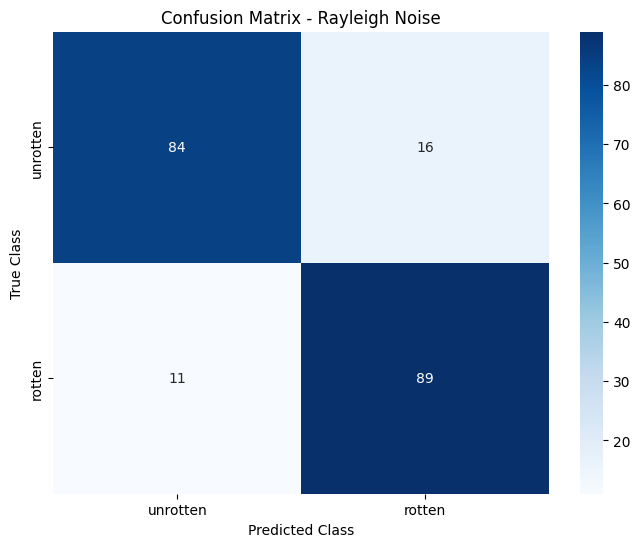


Classification Report:
              precision    recall  f1-score   support

    unrotten       0.88      0.84      0.86       100
      rotten       0.85      0.89      0.87       100

    accuracy                           0.86       200
   macro avg       0.87      0.86      0.86       200
weighted avg       0.87      0.86      0.86       200


Akurasi Keseluruhan: 0.8650 (86.50%)
Prediksi benar: 173/200
Akurasi unrotten: 0.8400 (84.00%)
Akurasi rotten: 0.8900 (89.00%)


In [43]:
results_rayleigh_noise = evaluate_yolo_model(
    model, noise_rayleigh, mapping_rayleigh_noise,
    class_names, conf_threshold, "Rayleigh Noise"
)

###Restorasi dengan Filter Bilateral


EVALUASI: Rayleigh Setelah Restorasi
Folder: /content/drive/MyDrive/PCD Proyek/Model/test restorasi/rayleigh2

Memproses rotten_rayleigh_bilateral5x5 (true class: unrotten)...

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/rayleigh2/rotten_rayleigh_bilateral5x5/rotten104.jpg: 224x224 rotten 1.00, unrotten 0.00, 3.3ms
Speed: 3.2ms preprocess, 3.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten104.jpg: True=unrotten, Pred=unrotten, Conf: rotten=1.00, unrotten=0.00

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/rayleigh2/rotten_rayleigh_bilateral5x5/rotten11.jpg: 224x224 unrotten 0.95, rotten 0.05, 3.0ms
Speed: 3.4ms preprocess, 3.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten11.jpg: True=unrotten, Pred=rotten, Conf: rotten=0.05, unrotten=0.95

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/rayleigh2/rotten_rayleigh_bilateral5x5/rotten114.jpg: 224x224 rotten 0.62, unrotten 0

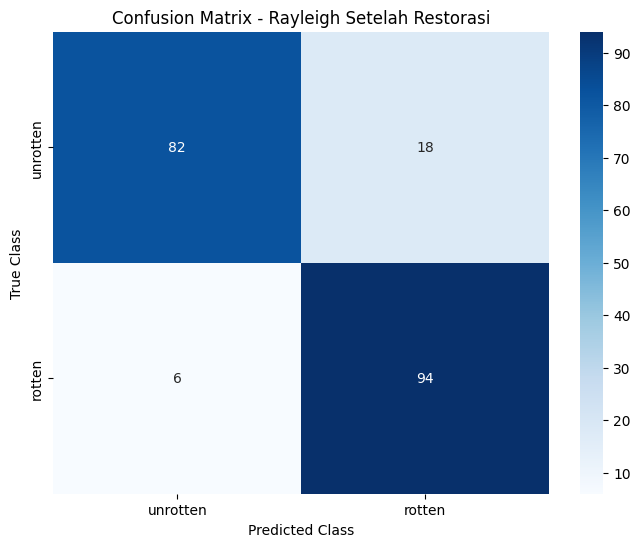


Classification Report:
              precision    recall  f1-score   support

    unrotten       0.93      0.82      0.87       100
      rotten       0.84      0.94      0.89       100

    accuracy                           0.88       200
   macro avg       0.89      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200


Akurasi Keseluruhan: 0.8800 (88.00%)
Prediksi benar: 176/200
Akurasi unrotten: 0.8200 (82.00%)
Akurasi rotten: 0.9400 (94.00%)


In [44]:
results_rayleigh_restoration = evaluate_yolo_model(
    model, restorasi_rayleigh, mapping_rayleigh_restorasi,
    class_names, conf_threshold, "Rayleigh Setelah Restorasi"
)

# Gaussian

## Evaluasi

In [45]:
noise_gaussian = '/content/drive/MyDrive/PCD Proyek/Model/test noise/gaussian'
restorasi_gaussian = '/content/drive/MyDrive/PCD Proyek/Model/test restorasi/gaussian'

###Noise


EVALUASI: Gaussian Noise
Folder: /content/drive/MyDrive/PCD Proyek/Model/test noise/gaussian

Memproses rotten_gaussian (true class: unrotten)...

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/gaussian/rotten_gaussian/rotten252.jpg: 224x224 unrotten 0.96, rotten 0.04, 3.3ms
Speed: 3.0ms preprocess, 3.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten252.jpg: True=unrotten, Pred=rotten, Conf: rotten=0.04, unrotten=0.96

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/gaussian/rotten_gaussian/rotten169.jpg: 224x224 rotten 1.00, unrotten 0.00, 3.0ms
Speed: 3.0ms preprocess, 3.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten169.jpg: True=unrotten, Pred=unrotten, Conf: rotten=1.00, unrotten=0.00

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/gaussian/rotten_gaussian/rotten306.jpg: 224x224 unrotten 0.60, rotten 0.40, 2.8ms
Speed: 2.6ms preprocess, 2.8ms inference, 0.0ms postprocess per image a

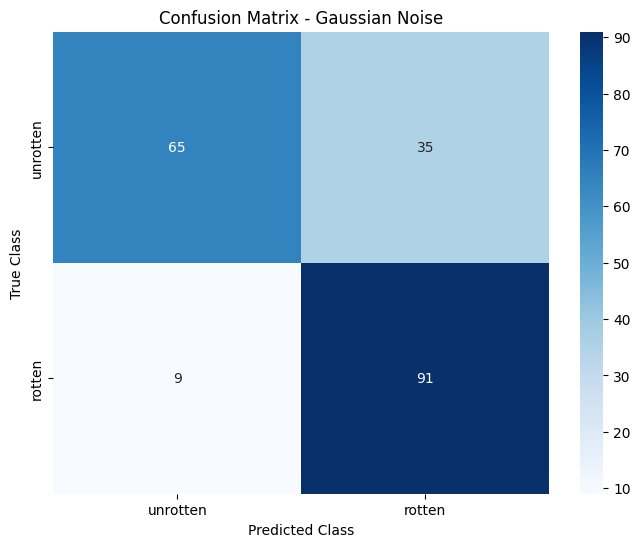


Classification Report:
              precision    recall  f1-score   support

    unrotten       0.88      0.65      0.75       100
      rotten       0.72      0.91      0.81       100

    accuracy                           0.78       200
   macro avg       0.80      0.78      0.78       200
weighted avg       0.80      0.78      0.78       200


Akurasi Keseluruhan: 0.7800 (78.00%)
Prediksi benar: 156/200
Akurasi unrotten: 0.6500 (65.00%)
Akurasi rotten: 0.9100 (91.00%)


In [46]:
results_gaussian_noise = evaluate_yolo_model(
    model, noise_gaussian, mapping_gaussian_noise,
    class_names, conf_threshold, "Gaussian Noise"
)

###Restorasi dengan Filter Mean


EVALUASI: Gaussian Setelah Restorasi
Folder: /content/drive/MyDrive/PCD Proyek/Model/test restorasi/gaussian

Memproses rotten_gaussian_mean5x5 (true class: unrotten)...

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/gaussian/rotten_gaussian_mean5x5/rotten252.jpg: 224x224 unrotten 0.74, rotten 0.26, 18.5ms
Speed: 3.0ms preprocess, 18.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  rotten252.jpg: True=unrotten, Pred=rotten, Conf: rotten=0.26, unrotten=0.74

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/gaussian/rotten_gaussian_mean5x5/rotten169.jpg: 224x224 rotten 0.98, unrotten 0.02, 4.9ms
Speed: 11.3ms preprocess, 4.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
  rotten169.jpg: True=unrotten, Pred=unrotten, Conf: rotten=0.98, unrotten=0.02

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/gaussian/rotten_gaussian_mean5x5/rotten306.jpg: 224x224 rotten 0.94, unrotten 0.06, 9.0ms
Speed: 4

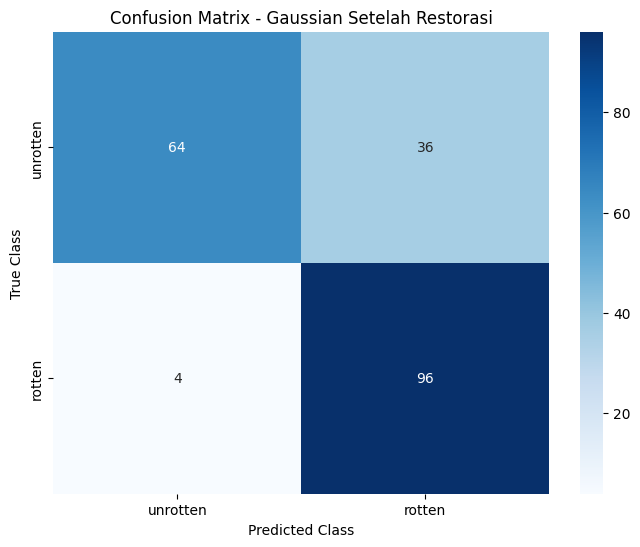


Classification Report:
              precision    recall  f1-score   support

    unrotten       0.94      0.64      0.76       100
      rotten       0.73      0.96      0.83       100

    accuracy                           0.80       200
   macro avg       0.83      0.80      0.79       200
weighted avg       0.83      0.80      0.79       200


Akurasi Keseluruhan: 0.8000 (80.00%)
Prediksi benar: 160/200
Akurasi unrotten: 0.6400 (64.00%)
Akurasi rotten: 0.9600 (96.00%)


In [47]:
results_gaussian_restoration = evaluate_yolo_model(
    model, restorasi_gaussian, mapping_gaussian_restorasi,
    class_names, conf_threshold, "Gaussian Setelah Restorasi"
)

#Salt and Pepper

##Evaluasi

In [48]:
noise_saltnpepper = '/content/drive/MyDrive/PCD Proyek/Model/test noise/saltnpepper'
restorasi_saltnpepper = '/content/drive/MyDrive/PCD Proyek/Model/test restorasi/saltnpepper'

###Noise


EVALUASI: Salt & Pepper Noise
Folder: /content/drive/MyDrive/PCD Proyek/Model/test noise/saltnpepper

Memproses noise_rotten_saltnpepper (true class: unrotten)...

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/saltnpepper/noise_rotten_saltnpepper/rotten104.jpg: 224x224 rotten 1.00, unrotten 0.00, 3.3ms
Speed: 2.9ms preprocess, 3.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten104.jpg: True=unrotten, Pred=unrotten, Conf: rotten=1.00, unrotten=0.00

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/saltnpepper/noise_rotten_saltnpepper/rotten11.jpg: 224x224 unrotten 0.78, rotten 0.22, 3.5ms
Speed: 3.4ms preprocess, 3.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten11.jpg: True=unrotten, Pred=rotten, Conf: rotten=0.22, unrotten=0.78

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test noise/saltnpepper/noise_rotten_saltnpepper/rotten114.jpg: 224x224 rotten 0.74, unrotten 0.26, 2.9ms
Speed: 2.7ms preproc

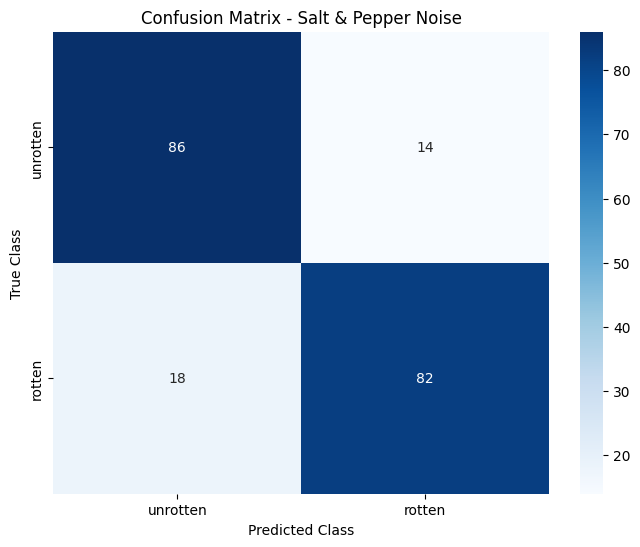


Classification Report:
              precision    recall  f1-score   support

    unrotten       0.83      0.86      0.84       100
      rotten       0.85      0.82      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Akurasi Keseluruhan: 0.8400 (84.00%)
Prediksi benar: 168/200
Akurasi unrotten: 0.8600 (86.00%)
Akurasi rotten: 0.8200 (82.00%)


In [49]:
results_saltnpepper_noise = evaluate_yolo_model(
    model, noise_saltnpepper, mapping_saltnpepper_noise,
    class_names, conf_threshold, "Salt & Pepper Noise"
)

###Restorasi dengan Filter Median


EVALUASI: Salt & Pepper Setelah Restorasi
Folder: /content/drive/MyDrive/PCD Proyek/Model/test restorasi/saltnpepper

Memproses rotten_saltnpepper (true class: unrotten)...

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/saltnpepper/rotten_saltnpepper/rotten104.jpg: 224x224 rotten 1.00, unrotten 0.00, 3.6ms
Speed: 3.3ms preprocess, 3.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten104.jpg: True=unrotten, Pred=unrotten, Conf: rotten=1.00, unrotten=0.00

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/saltnpepper/rotten_saltnpepper/rotten11.jpg: 224x224 unrotten 0.60, rotten 0.40, 3.1ms
Speed: 2.8ms preprocess, 3.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
  rotten11.jpg: True=unrotten, Pred=rotten, Conf: rotten=0.40, unrotten=0.60

image 1/1 /content/drive/MyDrive/PCD Proyek/Model/test restorasi/saltnpepper/rotten_saltnpepper/rotten114.jpg: 224x224 rotten 0.63, unrotten 0.37, 2.9ms
Speed: 2.8ms pre

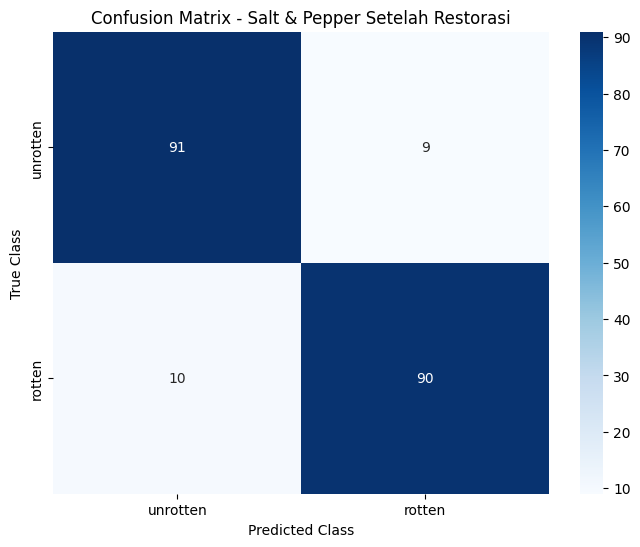


Classification Report:
              precision    recall  f1-score   support

    unrotten       0.90      0.91      0.91       100
      rotten       0.91      0.90      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200


Akurasi Keseluruhan: 0.9050 (90.50%)
Prediksi benar: 181/200
Akurasi unrotten: 0.9100 (91.00%)
Akurasi rotten: 0.9000 (90.00%)


In [50]:
results_saltnpepper_restoration = evaluate_yolo_model(
    model, restorasi_saltnpepper, mapping_saltnpepper_restorasi,
    class_names, conf_threshold, "Salt & Pepper Setelah Restorasi"
)

#Perbandingan hasil klasifikasi

In [51]:
print("\n" + "="*80)
print("Pebandingan Hasil 3 Noise dan Restorasinya")
print("="*80)

all_results = [
    results_rayleigh_noise,
    results_rayleigh_restoration,
    results_gaussian_noise,
    results_gaussian_restoration,
    results_saltnpepper_noise,
    results_saltnpepper_restoration
]

for result in all_results:
    if result:
        print(f"{result['title']:<25}: Accuracy = {result['accuracy']:.4f} ({result['accuracy']*100:.2f}%)")


Pebandingan Hasil 3 Noise dan Restorasinya
Rayleigh Noise           : Accuracy = 0.8650 (86.50%)
Rayleigh Setelah Restorasi: Accuracy = 0.8800 (88.00%)
Gaussian Noise           : Accuracy = 0.7800 (78.00%)
Gaussian Setelah Restorasi: Accuracy = 0.8000 (80.00%)
Salt & Pepper Noise      : Accuracy = 0.8400 (84.00%)
Salt & Pepper Setelah Restorasi: Accuracy = 0.9050 (90.50%)
